## Problem 1

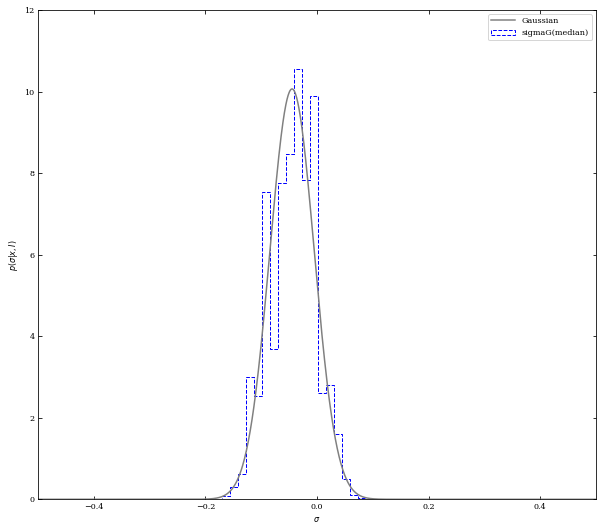

In [79]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from astroML.resample import bootstrap
from astroML.stats import median_sigmaG
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize = 8, usetex = False)

n = 1000  # no of values from gaussian
bootstrap_samples = 10000  # bootsrap samples
np.random.seed(123)
data = norm(0, 1).rvs(n)

# returns median and sigmaG arrays
median, sigmaG = bootstrap(data, bootstrap_samples,  median_sigmaG, kwargs = dict(axis=1))

x = np.linspace(-1, 1, 3000)

sigma = np.sqrt(np.pi/(2.0 * n))
pdf = norm(np.mean(median), sigma).pdf(x)

fig, ax = plt.subplots(figsize = (10, 9))

ax.hist(median, bins = 20, density=True, histtype='step', color='blue', ls = 'dashed', label = 'sigmaG(median)')
ax.plot(x, pdf, color = 'gray', label = 'Gaussian')

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 12)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.legend()
plt.show()

## Problem 2

slope of the best_fit :  2.2399207961186938
y-intercept of the best_fit :  34.04773403259783


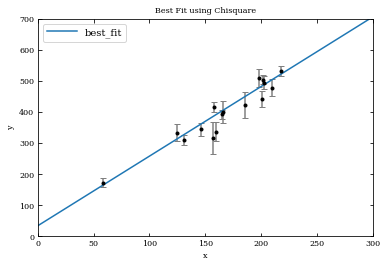

In [85]:
# import the libraries 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Function to fit the data
def func(x,m,b):
    return m*x + b

# Reading the data from local computer
data = pd.read_csv('data.csv')
X = data['x']
Y = data['y']
sigmaY = data['sigmaY']

# Getting the optimal values of slope and y-intercept from curve_fit function
val = np.zeros((1, 2))
popt, pcov = curve_fit(func, X, Y, val, sigmaY)

m = popt[0]
b = popt[1]

print("slope of the best_fit : ", m)
print("y-intercept of the best_fit : ", b)

x = np.linspace(0, 300, 3000)
fig, ax = plt.subplots()
ax.errorbar(X, Y, sigmaY, fmt = '.k', ecolor = 'gray')
ax.plot(x, func(x, m, b), label = 'best_fit')
plt.xlim(0, 300, 50)
plt.ylim(0, 700, 100)
ax.set(xlabel = 'x', ylabel = 'y', title = 'Best Fit using Chisquare');
ax.legend(loc = 'best', fontsize = 10)
plt.show()

## Problem 3

In [82]:
from scipy import stats

# ChiSquare_dof values obtained fromt the graphs
chi2dof = [0.96, 0.24, 3.84, 2.85]
# degree of freedom
df = 49
chi2 = []

# Computing the ChiSquare values by multiplying with df
for i in chi2dof:
    chi2.append(i*df)

# correct errors
print("p-value for graph - 1 :", (1 - stats.chi2(df).cdf(chi2[0])))
# p-value close to 1 overestimated error
print("p-value for graph - 2 :", (1 - stats.chi2(df).cdf(chi2[1])))
# p-value close to 0 underestimated error
print("p-value for graph - 3 :", (1 - stats.chi2(df).cdf(chi2[2])))
# p-value close to 0 incorrect model
print("p-value for graph - 4 :", (1 - stats.chi2(df).cdf(chi2[3])))


p-value for graph - 1 : 0.5529264339960218
p-value for graph - 2 : 0.9999999917009567
p-value for graph - 3 : 0.0
p-value for graph - 4 : 1.2107292945984227e-10
